# Kaggle Titanic Dataset

## Data Dictionary
---
- PassengerId: Id of the passenger
- Survived: Survival of the passenger (0 = No, 1 = Yes)
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: Name
- Sex: Sex
- Age: Age in years
- SibSp: Number of siblings / spouses aboard the Titanic
- Parch: Number of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression

## Loading the training dataset

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Missing values in Age, Cabin, and Embarked columns

In [6]:
train_df['Sex'] = train_df['Sex'].map({'male': 1, 'female': 0})
train_df['Embarked'].fillna('S', inplace=True)
train_df['Embarked'] = train_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})
train_df = train_df.drop(columns=['Cabin', 'Name', 'Ticket'])

## Visualizing the dataset

0    549
1    342
Name: Survived, dtype: int64

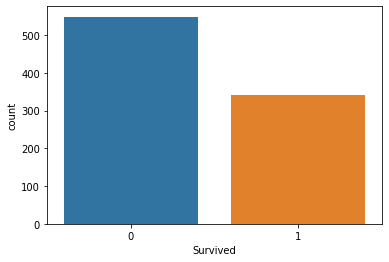

In [7]:
sns.countplot(x=train_df['Survived'])
train_df['Survived'].value_counts()

### Data correlation

In [8]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.010171
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.010171,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

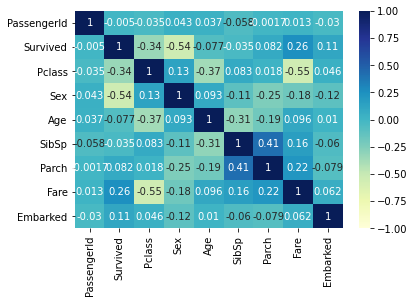

In [9]:
sns.heatmap(train_df.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap='YlGnBu')

Survived is positively correlated with Fare, i.e., People who paid more had a higher chance of survival. Both Pclass and Sex have highly negative correlation with Survived which means that women and higher class people had a better chance of survival.

#### Predicting ages in training dataset

In [10]:
df = train_df[['Pclass','Age', 'SibSp', 'Parch']]
df_miss = df[df['Age'].isnull()]
df = df.dropna()

y_train = df['Age']
x_train = df.drop('Age', axis=1)
x_test = df_miss.drop('Age', axis=1)

clf = svm.SVR()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

train_df.loc[train_df.Age.isnull(), 'Age'] = y_pred

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


Finally, no more missing data.

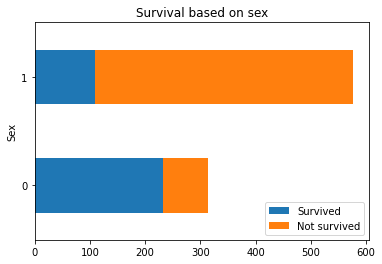

In [43]:
train_df.groupby('Sex').agg('sum')[['Survived', 'Not survived']].plot(kind='barh', stacked=True, title='Survival based on sex', )
train_df.drop(columns='Not survived', inplace=True)

<AxesSubplot:title={'center':'Ratio of survival based on sex'}, ylabel='Sex'>

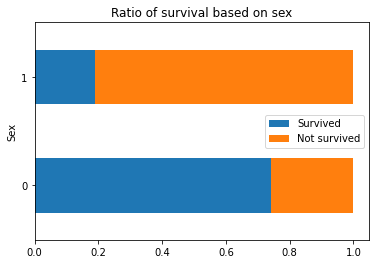

In [42]:
train_df['Not survived'] = 1 - train_df['Survived']
train_df.groupby('Sex').agg('mean')[['Survived', 'Not survived']].plot(kind='barh', stacked=True, title='Ratio of survival based on sex', )

Women had a higher chance of survival.

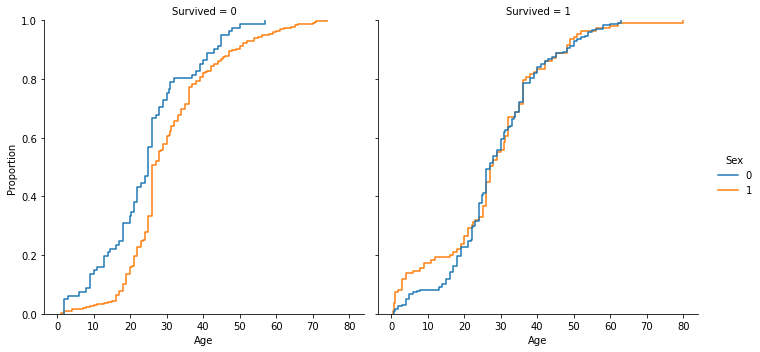

In [34]:
sns.displot(data=train_df, x='Age', hue='Sex', col='Survived', kind='ecdf')

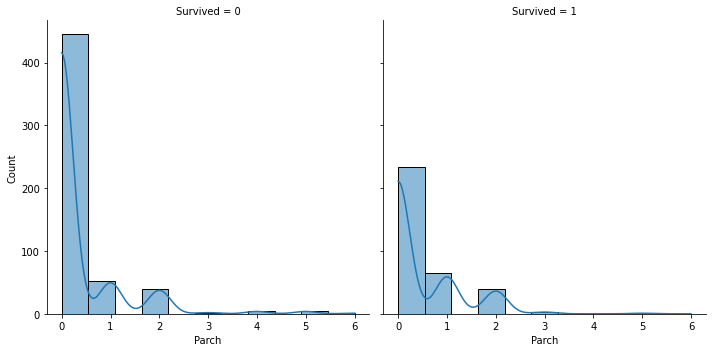

In [15]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.displot(data=train_df, x='Parch', col='Survived', kde=True)

People with 1, 2, or 3 Parent/Child had the highest chance of survival.

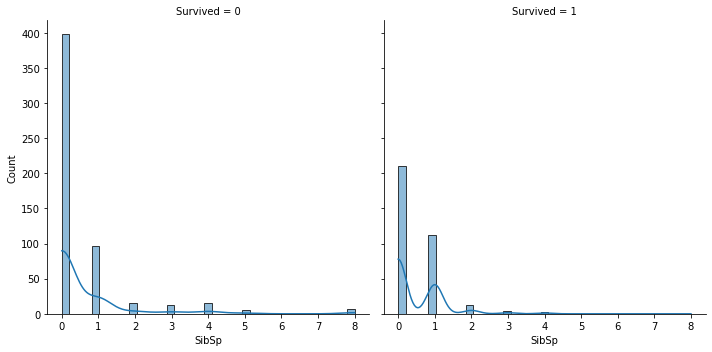

In [16]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.displot(data=train_df, x='SibSp', col='Survived', kde=True)

People with 1 or 2 Sibling/Spouse had the highest chance of survival.

## Loading the testing dataset

In [17]:
test_df = pd.read_csv('test.csv')

In [18]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})
test_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'] = test_df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

#### Prediciting ages in test dataset

In [21]:
df = test_df[['Pclass', 'SibSp', 'Parch', 'Age']]
df_miss = df[df['Age'].isnull()]
df= df.dropna()

y_train = df['Age']
x_train = df.drop('Age', axis=1)
x_test = df_miss.drop('Age', axis=1)

clf = svm.SVR()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
test_df.loc[test_df.Age.isnull(), 'Age'] = y_pred

In [22]:
test_df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
test_df.fillna(method='ffill', inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


## Predicting survival of the passengers

In [29]:
df = train_df
df_miss = test_df
y_train = df['Survived']
x_train = df.drop('Survived', axis=1)
x_test = df_miss

clf = LogisticRegression(n_jobs=-1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [30]:
print("Accuracy of ML model using logistic regression= %.2f%%" %(clf.score(x_train, y_train) * 100))

Accuracy of ML model using logistic regression= 80.25%


### Writing required to an output file

In [31]:
final = pd.DataFrame({'PassengerId': test_df.PassengerId,'Survived': y_pred})

In [32]:
final.to_csv('final.csv',index=False)